<a href="https://colab.research.google.com/github/praveenravi01/Machine-Leaning-Algorithms/blob/main/Statistics_2_on_Restaurant_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
ds=pd.read_csv("/content/Data.csv")

In [ ]:
ds.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN


In [ ]:
#To find the sold price in the date 19/7/23
dt=ds.groupby("Date")["Final Total"].mean().sort_values(ascending=False)
dt.head(1)

,Final Total
Date,
2023-07-19,319.837857


In [ ]:
#to find total bill
dt2=ds.groupby("Invoice No.")["Qty."].sum()
dt2.head()

,Qty.
Invoice No.,
26191,2.0
26192,1.0
26193,3.0
26194,6.0
26195,1.0


In [ ]:
dt2.count()
print(dt2)

Invoice No.
26191     2.0
26192     1.0
26193     3.0
26194     6.0
26195     1.0
         ... 
28385     6.0
28386    14.0
28387     9.0
28388    11.0
28389    10.0
Name: Qty., Length: 2199, dtype: float64


In [ ]:
Totalbill=ds["Invoice No."].nunique()
print(Totalbill)

2199


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7242 non-null   object 
 1   Timestamp    7242 non-null   object 
 2   Invoice No.  7242 non-null   int64  
 3   Item Name    7242 non-null   object 
 4   Price        7242 non-null   float64
 5   Qty.         7242 non-null   float64
 6   Sub Total    7242 non-null   float64
 7   Discount     7242 non-null   float64
 8   Tax          7242 non-null   float64
 9   Final Total  7242 non-null   float64
 10  Table No.    7242 non-null   int64  
 11  Server Name  7242 non-null   object 
 12  Covers       7242 non-null   int64  
 13  Variation    8 non-null      object 
 14  Category     7242 non-null   object 
 15  HSN          0 non-null      float64
dtypes: float64(7), int64(3), object(6)
memory usage: 905.4+ KB


In [ ]:
# to find the top sold item in the month of Setemper
fs=ds[(ds["Date"]>="2023-09-01")&(ds["Date"]<="2023-09-31")]

In [ ]:
fs.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN


In [ ]:
q=fs.groupby("Item Name")["Qty."].sum().sort_values(ascending=False)

In [ ]:
q.head(1)

,Qty.
Item Name,
Chicken Biriyani With Raitha And Gravy,268.0


In [ ]:
# to find the lowest sold item in July
fj=ds[(ds["Date"]>="2023-07-01")&(ds["Date"]<="2023-07-31")]

In [ ]:
c=fj.groupby("Category")["Qty."].sum().sort_values(ascending=True).head(3)
c.head(3)

,Qty.
Category,
NON VEG STARTERS FISH,49.0
NON VEG STARTERS EGG,53.0
Veg Soup,53.0


<Axes: xlabel='Category', ylabel='Qty.'>

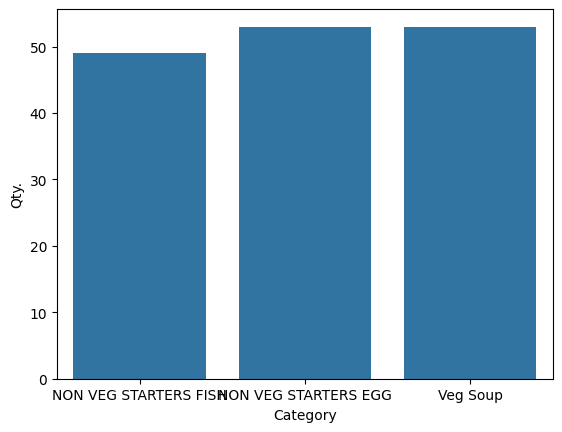

In [ ]:
sns.barplot(c)

In [ ]:
f_c=ds.groupby("Category")["Sub Total"].sum()
print(f_c)

Category
Deserts & Mocktails          49464.0
Indian Breads               113150.0
NON VEG BRIYANI & RICE      365290.0
NON VEG STARTERS CHICKEN    182833.0
NON VEG STARTERS EGG          6940.0
NON VEG STARTERS FISH        36019.0
NON VEG STARTERS MUTTON        239.0
Non Veg Gravy               117704.0
Non Veg Soup                 26550.0
Non Veg Tandoor              49683.0
Non Veg combos                6531.0
VEG BIRYANI & RICE           89230.0
Veg Gravy                    52610.0
Veg Soup                      9200.0
Veg Starters                 55600.0
Name: Sub Total, dtype: float64


([<matplotlib.patches.Wedge at 0x7e6d3cc0a150>,
 [Text(1.0901622480447084, 0.14678648758692955, 'Deserts & Mocktails'),
  Text(0.9237998128324975, 0.5971548424074303, 'Indian Breads'),
  Text(-0.3225835084543742, 1.0516367624200225, 'NON VEG BRIYANI & RICE'),
  Text(-1.0758414667306488, -0.22927088446387234, 'NON VEG STARTERS CHICKEN'),
  Text(-0.8244701424979415, -0.7281819718514214, 'NON VEG STARTERS EGG'),
  Text(-0.734452797073633, -0.818888935613809, 'NON VEG STARTERS FISH'),
  Text(-0.6507100153101837, -0.886891467979606, 'NON VEG STARTERS MUTTON'),
  Text(-0.3395960437357316, -1.0462669482875961, 'Non Veg Gravy'),
  Text(0.08404226596741843, -1.0967848000091276, 'Non Veg Soup'),
  Text(0.3068979062851683, -1.0563208201667618, 'Non Veg Tandoor'),
  Text(0.46340868989273587, -0.9976233688782046, 'Non Veg combos'),
  Text(0.7035539904131416, -0.8455836934175973, 'VEG BIRYANI & RICE'),
  Text(0.9689931493842788, -0.5206268111097786, 'Veg Gravy'),
  Text(1.0421407672117113, -0.352054

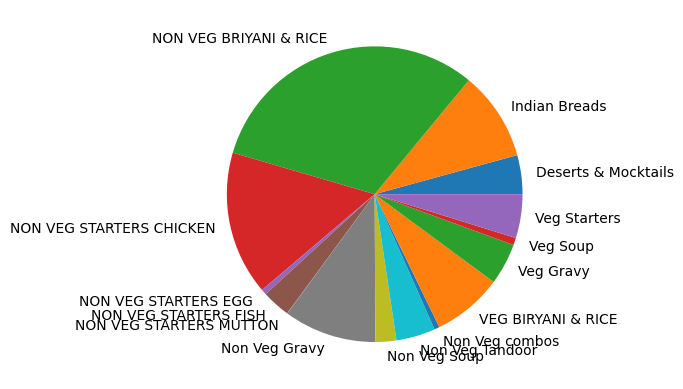

In [ ]:
plt.pie(f_c,labels=f_c.index)

In [ ]:
# To find the Average Amount
ds3=ds.groupby("Invoice No.")["Final Total"].sum()

In [ ]:
print(ds3)

Invoice No.
26191     336.00
26192     126.00
26193     157.50
26194     745.50
26195      21.00
          ...   
28385     493.50
28386    1479.44
28387    1501.50
28388    1928.82
28389     666.76
Name: Final Total, Length: 2199, dtype: float64


In [ ]:
TotalAmount=ds["Final Total"].sum()
TotalBill=ds["Invoice No."].nunique()

In [ ]:
print(TotalAmount/TotalBill)

549.4027239654388
